test


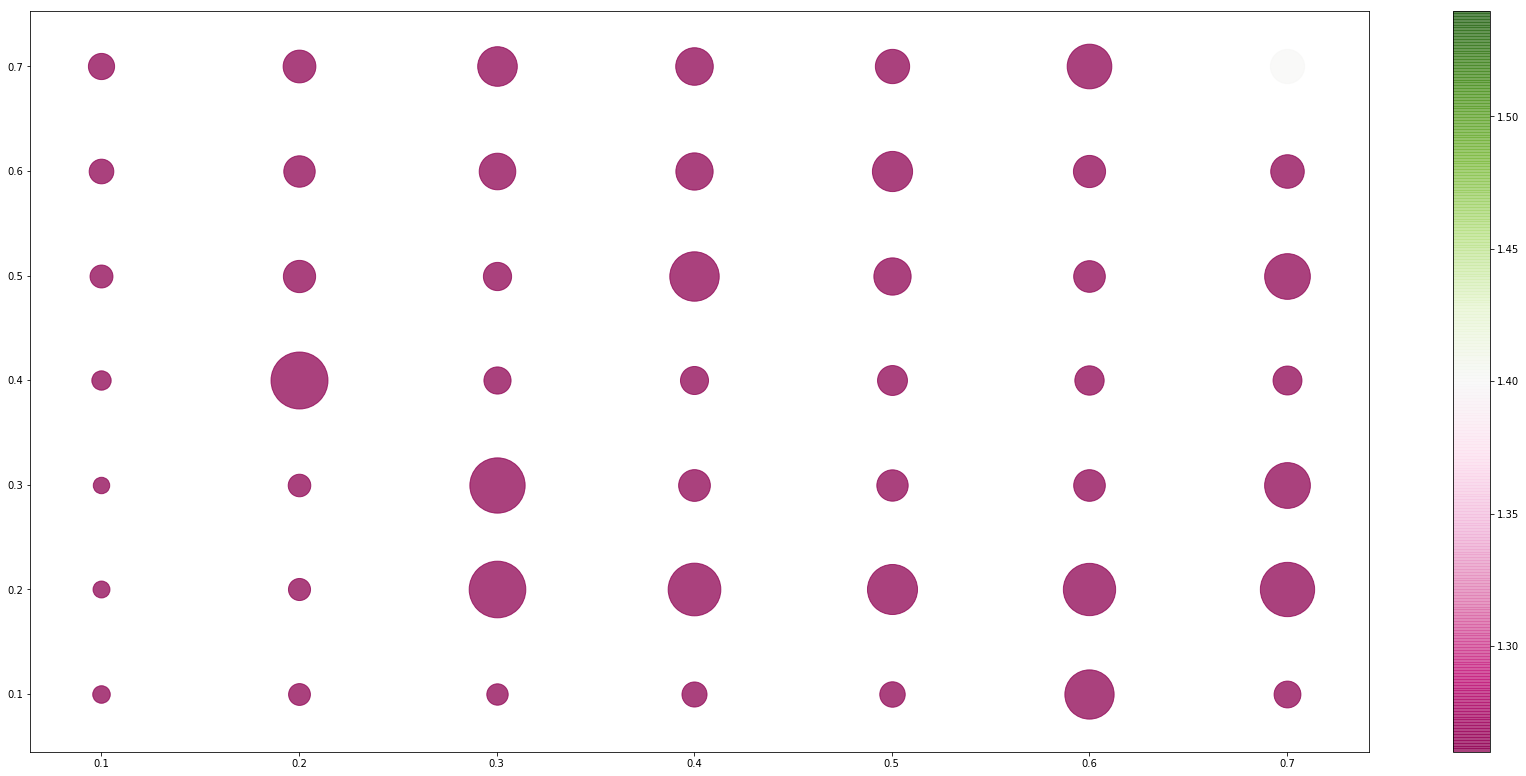

In [12]:
from pyspark import SparkContext 
import numpy as np
import matplotlib.pyplot as plt
import sklearn.svm as svm
import pandas as pd
from datetime import datetime
from ARPSimulator import ARPSimulator as arp
from SVMPredictor import SVMPredictor
import csv
from sklearn.metrics import mean_squared_error

lambda1 = 0.8
lambda2 = 0.8
numberOfSamples = 300

svmp = SVMPredictor()
lambda_range=0.1
lst = len(np.arange(lambda_range,lambda1,lambda_range)) # Get the length of the lambda range
 
lambda1_range = np.zeros((lst,lst))
lambda2_range =np.zeros((lst,lst))
r = 0;

fig = plt.figure(figsize=(30,30))
plt_two = plt.subplot(2,1,1)

plt_range = np.array([i for i in np.arange(lambda_range,lambda1,lambda_range)]);
for i in np.arange(lambda_range,lambda1,lambda_range):
    s = 0;
    for j in np.arange(lambda_range,lambda2, lambda_range):
        totalPwrLvl = arp.generateFreqEnergy(arp,i,j,numberOfSamples)
        powerData = pd.DataFrame(np.array(totalPwrLvl).reshape(-1,1),totalPwrLvl)
        powerData = powerData[powerData.columns[0:]].values
        powerLvlLambda = powerData.transpose()
        
        prediction = svmp.predictor(numberOfSamples,powerLvlLambda)
        
        score = prediction[1,:]
        accuracy = svmp.calculateAccuracy(score, powerLvlLambda, numberOfSamples)
        lambda1_range.itemset((r,s),accuracy/100)
        colors = (i+j)
        
        plt.scatter(i,j,c=colors, s=(accuracy)*10, alpha=0.75,cmap='PiYG')

        s = s + 1;
    r = r+1;

plt.colorbar()
fig.savefig("lambda0.8range0.01_300samples.png")

plt.show()

In [2]:
sc.stop() 

NameError: name 'sc' is not defined

In [3]:
from pyspark.ml.classification import LogisticRegression
sc = SparkContext("local[3]","AppTestingSystem")
model = LogisticRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8)

In [4]:
 print(sc)

<SparkContext master=local[3] appName=AppTestingSystem>
